In [6]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib tk
import pickle
from tqdm import tqdm

In [7]:
import torch
import torch.nn as nn

In [49]:
from scipy.spatial import distance

## 1D function

In [8]:
# def invex_func_1d(x):
#     x_ = x*7+0.5
#     y_ = 0.2*np.exp(-2*(x_+0.2)**2) + 0.8*np.cos(x_) - 0.1*x_**2 + 0.1*x_
#     y = -y_/3.1 - 0.61
#     return y

In [9]:
# x = np.linspace(-1, 1, 300)
# y = invex_func_1d(x)

# %matplotlib inline
# # plt.scatter(x, y, marker='.', color='g')
# plt.plot(x, y, color='g', lw=2)
# plt.hlines(0, -1, 1)
# plt.vlines(0, -1, 1)
# plt.xlim(-1, 1)
# plt.ylim(-1, 1)
# plt.xlabel("x")
# plt.ylabel("y = f(x)")
# plt.grid()
# plt.show()

## 2D visualization - Invex

In [392]:
with open("./models/new_2d_invex_plot_data.pkl", 'rb') as f:
# with open("./models/new_2d_quasiConvex_plot_data.pkl", 'rb') as f:
    data = pickle.load(f)

X1, X2, Y, center = data["x1"], data["x2"], data["y"]+1, data["center"]
center = (center[0], center[1], center[2]+1)
center

(-0.6767676767676767, 0.1515151515151516, 1.031736135482788)

In [393]:
# num_points = 100
# # X1 = np.linspace(-2.5, 1.9, num_points)
# X1 = np.linspace(-2.5, 2.5, num_points)
# X2 = np.linspace(-2.5, 3, num_points)
# # X2 = np.linspace(-2.2, 2.1, num_points)
# X1, X2 = np.meshgrid(X1, X2)

# # Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1. - 0.1*(X1)+0.02*(X2)
# Y = np.sqrt(X1**2 + X2**2)

# ####Scaling the data to range -1,1
# X1 = 2*(X1 - X1.min())/(X1.max() - X1.min()) -1
# X2 = 2*(X2 - X2.min())/(X2.max() - X2.min()) -1
# Y = 2*(Y - Y.min())/(Y.max() - Y.min()) -1
# # Y = -Y

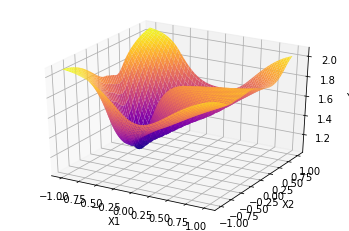

In [394]:
x1 = X1.reshape(-1)
x2 = X2.reshape(-1)
y = Y.reshape(-1)

xx = torch.Tensor(np.c_[x1, x2])
yy = torch.Tensor(Y.reshape(-1,1))

%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.plot_surface(X1, X2, Y, cmap='plasma')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [395]:
dx1, dx2 = 0.35, 0.35
X1_, X2_ = X1+dx1, X2+dx2

In [396]:
%matplotlib tk

# fig = plt.figure(figsize=(7,6.2/6*5))
fig = plt.figure(figsize=(8,6))
# fig = plt.figure(figsize=(12,8))
ax = fig.gca(projection='3d')
# ax.view_init(43, -49)
# ax.view_init(49, -71)
# ax.view_init(27, -65)
ax.view_init(40, -50)

ax.plot_surface(X1, X2, Y, cmap="viridis", alpha=0.8)
# ax.plot_wireframe(X1, X2, Y, alpha=0.5, lw=0.5, color='k')

# ax.plot_surface(X1_, X2_, Y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(X1_, X2_, Y, alpha=0.5, lw=0.5, color='k')



# ax.contour3D(x1, x2, y, alpha=0.9, levels=lvls, linestyles="None", colors="k")
# ax.scatter(*center, marker="*", lw=1, color='r', s=50)
# ax.plot([center[0]],[center[1]],[center[2]], 'r*', alpha=0.5)
# ax.plot(bx1, bx2, by, color="red", alpha=1, lw=2)#'dimgray'

# ax.contour(x1, x2, y, zdir='z', offset=-1.2, linestyles="None", linewidths=0.9)
# plt.title("(c)")

plt.locator_params(axis='x', nbins=5)
plt.locator_params(axis='y', nbins=5)
plt.locator_params(axis='z', nbins=5)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y = f(x1, x2)')
plt.pause(10)
plt.show()

TclError: can't invoke "update" command: application has been destroyed

## Intersection of 2 Cones

In [397]:
C0 = np.c_[x1, x2, y]

In [398]:
### Third cone
dc2 = np.array([[-0.4, -0.4, 0]])
C1 = C0+dc2

In [399]:
### Find all the points that match on the x,y,z
dists = distance.cdist(C0, C1)
dists = dists.min(axis=1)

eps=0.0079
mask = dists<eps
print(np.count_nonzero(mask))
indices = np.nonzero(mask)
M0 = C0[indices]
# Y0 = ty[indices]

73


In [400]:
# M0

In [401]:
%matplotlib tk

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.view_init(40, -50)

ax.plot_surface(C0[:,0].reshape(X1.shape), C0[:,1].reshape(X1.shape), Y, cmap="viridis", alpha=0.8)
# ax.plot_wireframe(X1, X2, Y, alpha=0.5, lw=0.5, color='k')
# ax.plot_surface(X1_, X2_, Y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(C1[:,0].reshape(X1.shape), C1[:,1].reshape(X1.shape), Y, alpha=0.5, lw=0.5, color='k')

# ax.scatter(match_pt[:,0], match_pt[:,1], match_pt[:,2], s=100, color='r', marker='o')
ax.scatter(M0[:,0], M0[:,1], M0[:,2], s=60, edgecolor='k', color='r', marker='o')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y = f(x1, x2)')
plt.pause(10)
plt.show()

TclError: can't invoke "update" command: application has been destroyed

In [402]:
### Third cone
dc2 = np.array([[-0.4, 0.3, 0]])
C2 = C0+dc2

In [409]:
dists = distance.cdist(M0, C2)
# print(dists, dists.shape)
dists = dists.min(axis=1)

eps=0.007
mask = dists<eps
print(np.count_nonzero(mask))
indices = np.nonzero(mask)
M1 = M0[indices]

3


In [410]:
M1

array([[ 0.43434343, -0.15151515,  1.83517921],
       [ 0.45454545, -0.15151515,  1.83867359],
       [-0.09090909, -0.07070707,  1.69244456]])

In [411]:
%matplotlib tk

fig = plt.figure(figsize=(8,6))
ax = fig.gca(projection='3d')
ax.view_init(40, -50)

ax.plot_surface(C0[:,0].reshape(X1.shape), C0[:,1].reshape(X1.shape), Y, cmap="viridis", alpha=0.8)
# ax.plot_wireframe(X1, X2, Y, alpha=0.5, lw=0.5, color='k')
# ax.plot_surface(X1_, X2_, Y, cmap="viridis", alpha=0.8)
ax.plot_wireframe(C1[:,0].reshape(X1.shape), C1[:,1].reshape(X1.shape), Y, alpha=0.5, lw=0.5, color='k')

ax.plot_wireframe(C2[:,0].reshape(X1.shape), C2[:,1].reshape(X1.shape), Y, alpha=0.5, lw=0.5, color='k')

ax.scatter(M1[:,0], M1[:,1], M1[:,2], s=60, edgecolor='k', color='r', marker='o')


ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y = f(x1, x2)')
plt.pause(10)
plt.show()

TclError: can't invoke "update" command: application has been destroyed

### For invex Function